## Classification 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

### IRIS DATASET

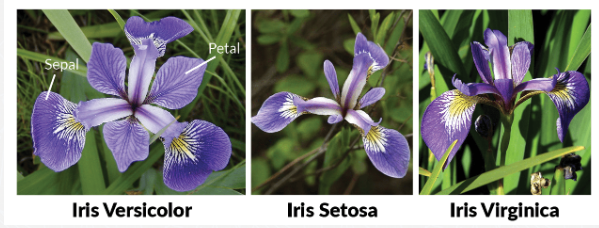

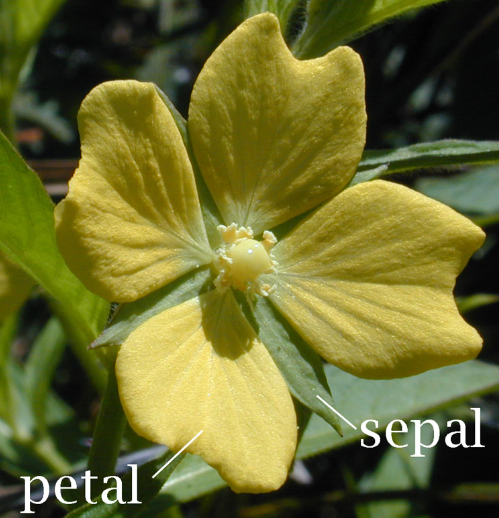

In [2]:
data = sns.load_dataset('iris')
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
87,6.3,2.3,4.4,1.3,versicolor
55,5.7,2.8,4.5,1.3,versicolor
36,5.5,3.5,1.3,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
76,6.8,2.8,4.8,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
99,5.7,2.8,4.1,1.3,versicolor
53,5.5,2.3,4.0,1.3,versicolor
94,5.6,2.7,4.2,1.3,versicolor


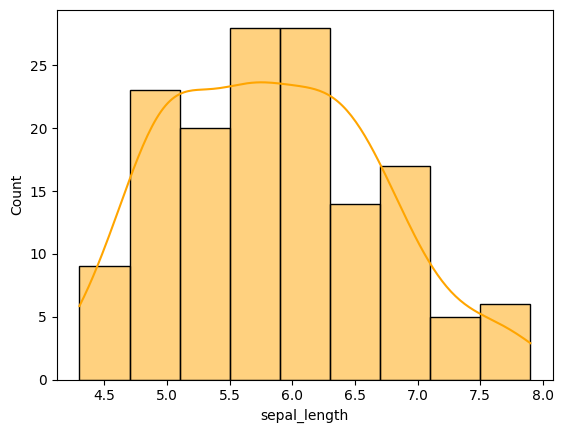

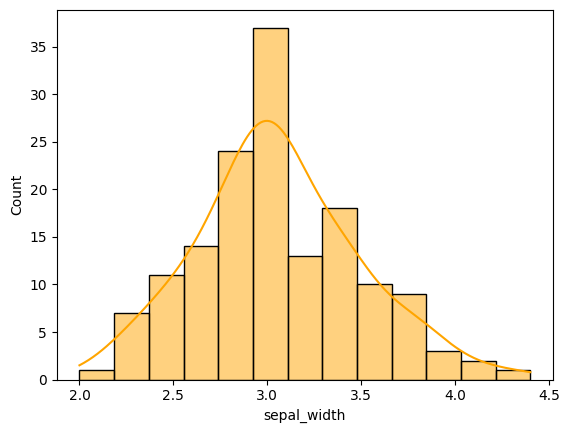

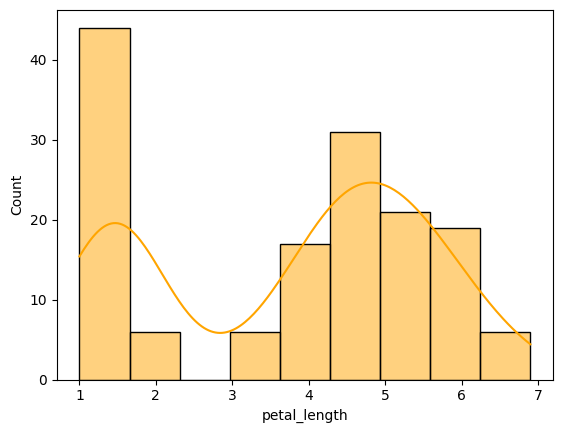

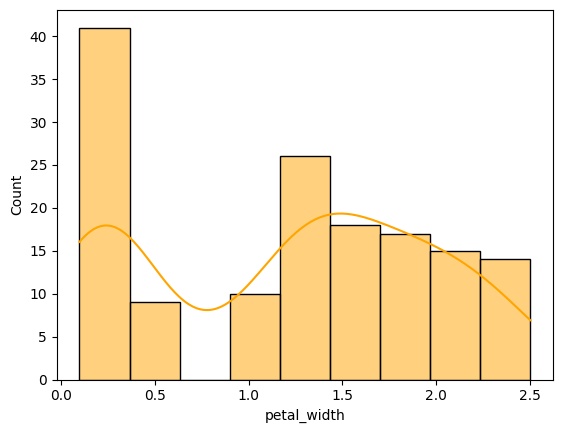

In [3]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="orange")
        plt.show()

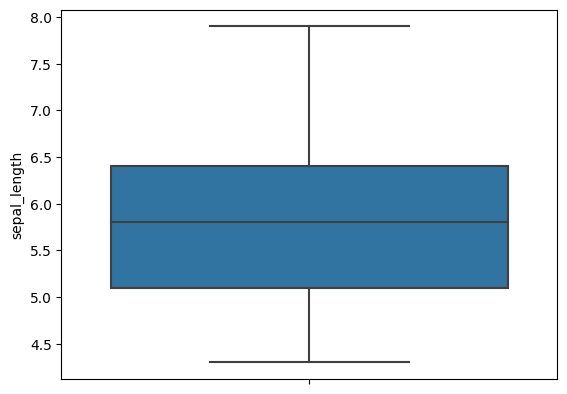

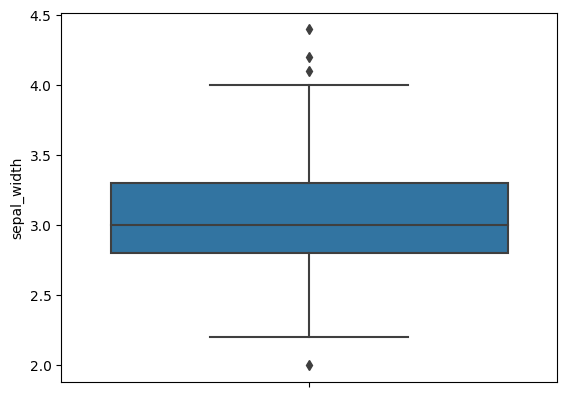

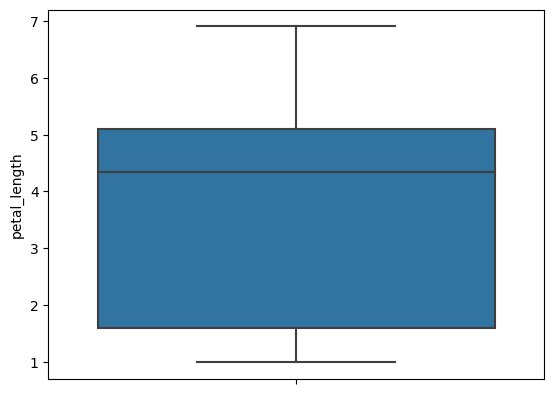

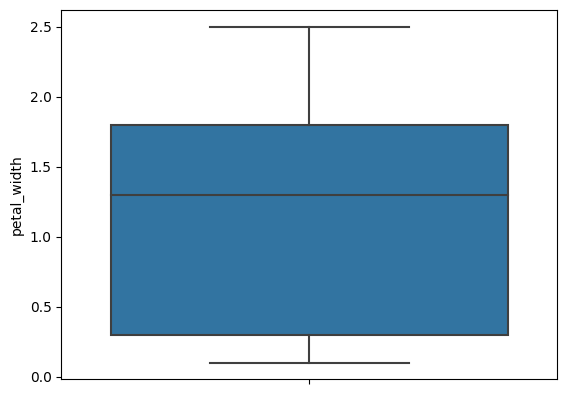

In [4]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()

In [5]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [6]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

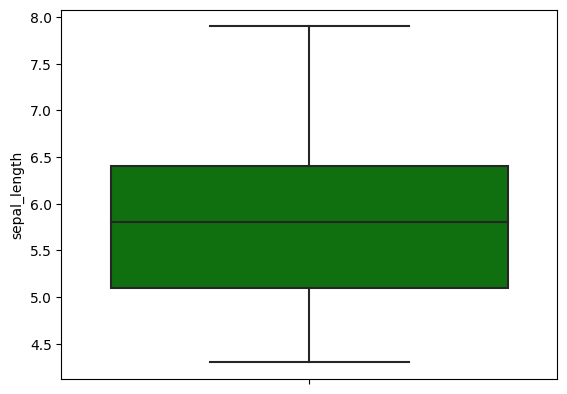

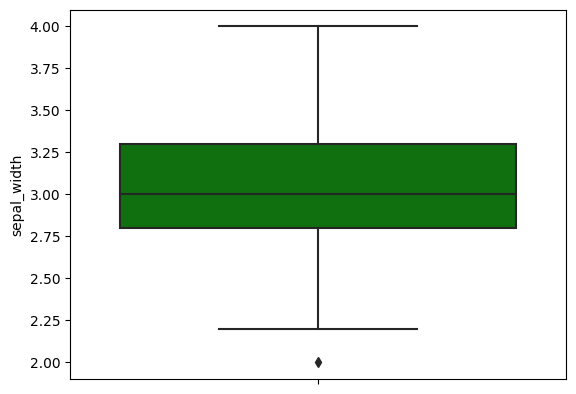

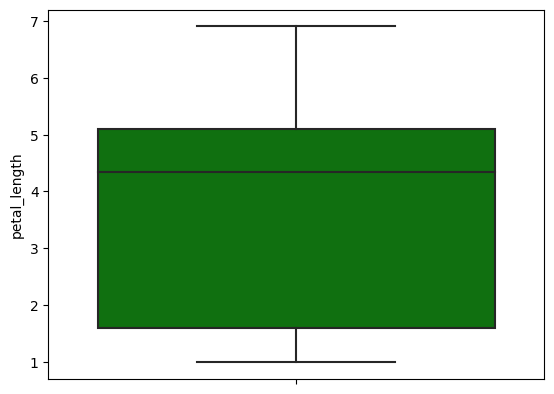

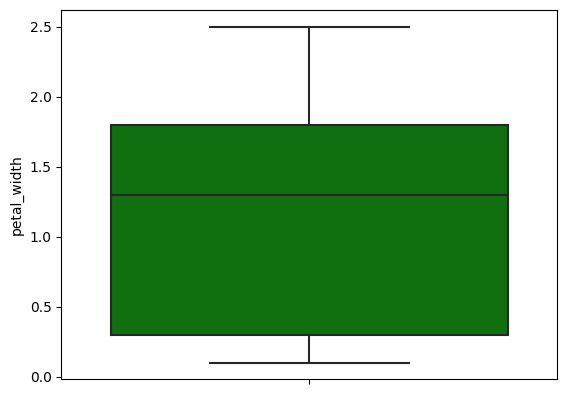

In [7]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()

In [8]:
data.isnull().mean()*100

sepal_length    0.0
sepal_width     2.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [11]:
le = LabelEncoder()

In [12]:
data['species'] = le.fit_transform(data['species'])

In [13]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,0
148,6.2,3.4,5.4,2.3,2
54,6.5,2.8,4.6,1.5,1
76,6.8,2.8,4.8,1.4,1
104,6.5,3.0,5.8,2.2,2
132,6.4,2.8,5.6,2.2,2
92,5.8,2.6,4.0,1.2,1
122,7.7,2.8,6.7,2.0,2
42,4.4,3.2,1.3,0.2,0
57,4.9,2.4,3.3,1.0,1


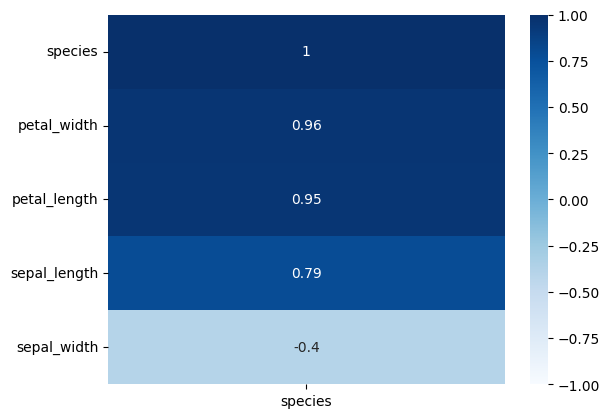

In [15]:
sns.heatmap(data.corr()[["species"]].sort_values(by="species", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

In [16]:
data.drop(columns='sepal_width', inplace=True)

### Selecting features by iloc method:

In [17]:
x = data.iloc[:,:-1].values

In [18]:
y= data.iloc[:, -1].values

In [19]:
sc=StandardScaler()

In [20]:
x= sc.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.9572649572649573
Model accuracy on test is::  0.9666666666666667
confusion_matrix train is::  [[36  0  0]
 [ 0 38  2]
 [ 0  3 38]]
confusion_matrix test is::  [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Wrong Predictions made: 1 / 30
************************************************************


In [24]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [25]:
data1 = sns.load_dataset('iris')
data1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
data

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


In [27]:
OUTPUT.sample(30)

,ACTUAL,PREDICTION
69,1,1
129,2,2
11,0,0
40,0,0
130,2,1
28,0,0
113,2,2
56,1,1
83,1,1
3,0,0
